#MMDetection 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch

torch.__version__

'1.12.0+cu113'

In [3]:
!pip install mmcv-full==1.6.0 -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.1 MB 63.4 MB/s 
     |████████████████████████████████| 190 kB 5.0 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 28978, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 28978 (delta 8), reused 16 (delta 1), pack-reused 28948
Receiving objects: 100% (28978/28978), 39.43 MiB | 31.79 MiB/s, done.
Resolving deltas: 100% (20684/20684), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest

In [1]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [2]:
%cd /content

/content


In [3]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class CatDataset(CocoDataset):
  CLASSES = ('cats', 'cat', 'cattrack_idkeyframe') 

In [4]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [5]:
!pwd

/content


In [6]:
!cd /content/mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-07-27 15:22:42--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.85
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  8.33MB/s    in 19s     

2022-07-27 15:23:03 (8.27 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [9]:
!ls -lia /content/mmdetection/checkpoints

total 163376
5246963 drwxr-xr-x  2 root root      4096 Jul 27 15:22 .
5242886 drwxr-xr-x 19 root root      4096 Jul 27 15:22 ..
5246964 -rw-r--r--  1 root root 167287506 Nov  2  2021 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [11]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [32]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'CatDataset'
cfg.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'CatDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'CatDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'
cfg.data.val.ann_file = 'valid.json'
cfg.data.val.img_prefix = 'valid'

cfg.data.test.type = 'CatDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'test'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 3
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

cfg.device='cuda'

In [33]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


In [34]:
print(datasets[0])
# datasets[0].__dict__ 로 모든 self variables의 key와 value값을 볼 수 있음. 
datasets[0].__dict__.keys()


CatDataset Train dataset with number of images 6631, and instance counts: 
+----------+-------+----------+-------+-------------------------+-------+----------+-------+----------+-------+
| category | count | category | count | category                | count | category | count | category | count |
+----------+-------+----------+-------+-------------------------+-------+----------+-------+----------+-------+
|          |       |          |       |                         |       |          |       |          |       |
| 0 [cats] | 0     | 1 [cat]  | 577   | 2 [cattrack_idkeyframe] | 8700  |          |       |          |       |
+----------+-------+----------+-------+-------------------------+-------+----------+-------+----------+-------+


dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'file_client', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [35]:
datasets[0].data_infos

[{'date_captured': '2022-07-26T19:13:35+00:00',
  'file_name': 'frame_001707_PNG.rf.91f68e6b678edc3a1fde1f2075db5225.jpg',
  'filename': 'frame_001707_PNG.rf.91f68e6b678edc3a1fde1f2075db5225.jpg',
  'height': 416,
  'id': 1,
  'license': 1,
  'width': 416},
 {'date_captured': '2022-07-26T19:13:35+00:00',
  'file_name': 'frame_000113_PNG_jpg.rf.921f9fd9420a9e55f35c189302a3e08b.jpg',
  'filename': 'frame_000113_PNG_jpg.rf.921f9fd9420a9e55f35c189302a3e08b.jpg',
  'height': 416,
  'id': 3,
  'license': 1,
  'width': 416},
 {'date_captured': '2022-07-26T19:13:35+00:00',
  'file_name': 'frame_000021_PNG_jpg.rf.921c67f18a0d6aa7bd11c11b7f31d8ce.jpg',
  'filename': 'frame_000021_PNG_jpg.rf.921c67f18a0d6aa7bd11c11b7f31d8ce.jpg',
  'height': 416,
  'id': 5,
  'license': 1,
  'width': 416},
 {'date_captured': '2022-07-26T19:13:35+00:00',
  'file_name': 'frame_000606_PNG.rf.91f0f2bc5c185315189b17dfc9354f6b.jpg',
  'filename': 'frame_000606_PNG.rf.91f0f2bc5c185315189b17dfc9354f6b.jpg',
  'height': 4

In [36]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', channel_order='bgr', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, poly2mask={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [37]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('cats', 'cat', 'cattrack_idkeyframe')


In [38]:
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-07-27 17:04:30,570 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2022-07-27 17:04:31,012 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2022-07-27 17:04:31,146 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([12]).
2022-07-27 17:04:31,152 - mmdet - INFO - Start running, host: root@40ba4728b7b6, 

Done (t=0.42s)
creating index...
index created!


2022-07-27 17:04:44,770 - mmdet - INFO - Epoch [1][10/3316]	lr: 2.500e-03, eta: 14:57:55, time: 1.354, data_time: 0.349, memory: 2628, loss_rpn_cls: 0.0093, loss_rpn_bbox: 0.0096, loss_cls: 0.4917, acc: 84.6875, loss_bbox: 0.2228, loss: 0.7334
2022-07-27 17:04:49,520 - mmdet - INFO - Epoch [1][20/3316]	lr: 2.500e-03, eta: 10:06:16, time: 0.475, data_time: 0.266, memory: 2628, loss_rpn_cls: 0.0157, loss_rpn_bbox: 0.0052, loss_cls: 0.1545, acc: 95.4590, loss_bbox: 0.1828, loss: 0.3582
2022-07-27 17:04:53,784 - mmdet - INFO - Epoch [1][30/3316]	lr: 2.500e-03, eta: 8:18:17, time: 0.426, data_time: 0.216, memory: 2628, loss_rpn_cls: 0.0090, loss_rpn_bbox: 0.0039, loss_cls: 0.1001, acc: 97.0898, loss_bbox: 0.1374, loss: 0.2504
2022-07-27 17:04:57,908 - mmdet - INFO - Epoch [1][40/3316]	lr: 2.500e-03, eta: 7:21:55, time: 0.412, data_time: 0.200, memory: 2628, loss_rpn_cls: 0.0118, loss_rpn_bbox: 0.0052, loss_cls: 0.1010, acc: 97.2852, loss_bbox: 0.1359, loss: 0.2539
2022-07-27 17:05:01,978 - 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2363/2363, 5.3 task/s, elapsed: 450s, ETA:     0s

2022-07-27 20:02:13,073 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-07-27 20:02:14,111 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.859
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.919
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.913
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.439
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.787
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.864
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.941
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.941
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.941
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.450
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.842
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.83s).
Accumulating evaluation results...
DONE (t=0.17s).


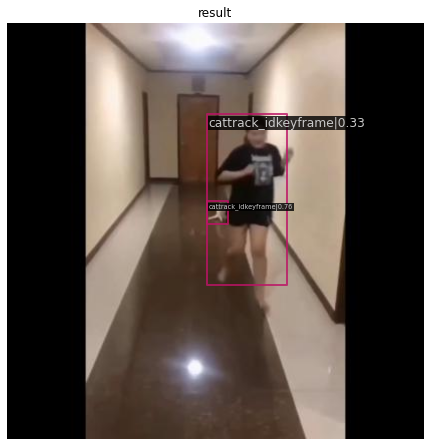

In [45]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cat_dataset/test/frame_004230_PNG.rf.86fe9c58f0cb4c76faf0026fe5157f54.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [46]:
from google.colab import files
files.download('/content/tutorial_exps/epoch_12.pth')
files.download('/content/tutorial_exps/latest.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Evaluation

In [2]:
### 아래는 런타임 다시 시작 후 실행

from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed

@DATASETS.register_module(force=True)
class CatDataset(CocoDataset):
  CLASSES = ('cats', 'cat', 'cattrack_idkeyframe')  

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

cfg = Config.fromfile(config_file)

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'CatDataset'
cfg.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'CatDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'CatDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'
cfg.data.val.ann_file = 'valid.json'
cfg.data.val.img_prefix = 'valid'

cfg.data.test.type = 'CatDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/Colab Notebooks/cat_dataset/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'test'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 3
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.samples_per_gpu = 1
cfg.device='cuda'

In [5]:
!mkdir -p /content/show_test_output

In [3]:
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        samples_per_gpu=cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

# 반드시 아래 코드에서 'img' 키값이 tensor로 출력되어야 함. 
next(iter(data_loader))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


{'img': [tensor([[[[-1.0562, -1.0733, -1.1247,  ...,  1.0331,  1.0502,  1.0673],
            [-1.0562, -1.0733, -1.1247,  ...,  1.0331,  1.0502,  1.0502],
            [-1.0390, -1.0733, -1.1075,  ...,  0.9988,  1.0159,  1.0159],
            ...,
            [ 0.1768,  0.1939,  0.2111,  ...,  0.4679,  0.5536,  0.6221],
            [ 0.1254,  0.1426,  0.1597,  ...,  0.4851,  0.5364,  0.5536],
            [ 0.0912,  0.1083,  0.1426,  ...,  0.4851,  0.5022,  0.5193]],
  
           [[-1.2129, -1.2654, -1.3529,  ...,  0.8704,  0.8880,  0.9055],
            [-1.2129, -1.2654, -1.3529,  ...,  0.8704,  0.8880,  0.8880],
            [-1.1954, -1.2479, -1.3354,  ...,  0.8529,  0.8529,  0.8529],
            ...,
            [ 0.0651,  0.0651,  0.1001,  ...,  0.2402,  0.3452,  0.3803],
            [ 0.0126,  0.0301,  0.0651,  ...,  0.2577,  0.2927,  0.3277],
            [-0.0224, -0.0049,  0.0301,  ...,  0.2577,  0.2752,  0.2927]],
  
           [[-0.9330, -0.9504, -0.9853,  ...,  0.8448,  0.8622,

In [4]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint_file = '/content/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/tutorial_exps/epoch_12.pth


In [8]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 958/958, 6.1 task/s, elapsed: 156s, ETA:     0s

In [5]:
import numpy as np
import cv2

CLASSES = ('Cat_', 'Cat__', 'Cat___')
cat2label = {k:i for i, k in enumerate(CLASSES)}
labels_to_names_seq = {i:k for i, k in enumerate(CLASSES)}

def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(result) == 0:
      continue
    
    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외. 
    result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출. 
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

In [6]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold, is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [7]:
do_detected_video(model_ckpt, '/content/bandicam 2022-07-28 09-08-47-731.mp4', '/content/cat1.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 1671


/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


frame별 detection 수행 시간: 1.2426
frame별 detection 수행 시간: 0.1121
frame별 detection 수행 시간: 0.2466
frame별 detection 수행 시간: 0.1039
frame별 detection 수행 시간: 0.095
frame별 detection 수행 시간: 0.0935
frame별 detection 수행 시간: 0.0951
frame별 detection 수행 시간: 0.0953
frame별 detection 수행 시간: 0.0973
frame별 detection 수행 시간: 0.0956
frame별 detection 수행 시간: 0.0984
frame별 detection 수행 시간: 0.092
frame별 detection 수행 시간: 0.0951
frame별 detection 수행 시간: 0.0918
frame별 detection 수행 시간: 0.0973
frame별 detection 수행 시간: 0.092
frame별 detection 수행 시간: 0.098
frame별 detection 수행 시간: 0.0924
frame별 detection 수행 시간: 0.0976
frame별 detection 수행 시간: 0.0947
frame별 detection 수행 시간: 0.0942
frame별 detection 수행 시간: 0.0932
frame별 detection 수행 시간: 0.0936
frame별 detection 수행 시간: 0.0915
frame별 detection 수행 시간: 0.0968
frame별 detection 수행 시간: 0.0921
frame별 detection 수행 시간: 0.0954
frame별 detection 수행 시간: 0.0932
frame별 detection 수행 시간: 0.0947
frame별 detection 수행 시간: 0.0928
frame별 detection 수행 시간: 0.0961
frame별 detection 수행 시간: 0.0919
frame별 detec

In [8]:
do_detected_video(model_ckpt, '/content/cat2.mp4', '/content/cat2_detected.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 3601
frame별 detection 수행 시간: 0.1087
frame별 detection 수행 시간: 0.1001
frame별 detection 수행 시간: 0.0993
frame별 detection 수행 시간: 0.1064
frame별 detection 수행 시간: 0.0966
frame별 detection 수행 시간: 0.0981
frame별 detection 수행 시간: 0.0968
frame별 detection 수행 시간: 0.1048
frame별 detection 수행 시간: 0.0949
frame별 detection 수행 시간: 0.1011
frame별 detection 수행 시간: 0.0944
frame별 detection 수행 시간: 0.1
frame별 detection 수행 시간: 0.096
frame별 detection 수행 시간: 0.098
frame별 detection 수행 시간: 0.0977
frame별 detection 수행 시간: 0.0978
frame별 detection 수행 시간: 0.0929
frame별 detection 수행 시간: 0.1004
frame별 detection 수행 시간: 0.0959
frame별 detection 수행 시간: 0.0989
frame별 detection 수행 시간: 0.0995
frame별 detection 수행 시간: 0.1003
frame별 detection 수행 시간: 0.0955
frame별 detection 수행 시간: 0.106
frame별 detection 수행 시간: 0.0976
frame별 detection 수행 시간: 0.1039
frame별 detection 수행 시간: 0.1003
frame별 detection 수행 시간: 0.0975
frame별 detection 수행 시간: 0.0986
frame별 detection 수행 시간: 0.1072
frame별 detection 수행 시간: 0.0982
frame별 detection 수행 시간: 0.10

In [9]:
do_detected_video(model_ckpt, '/content/cat3.mp4', '/content/cat3_detected.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 4776
frame별 detection 수행 시간: 0.1008
frame별 detection 수행 시간: 0.1015
frame별 detection 수행 시간: 0.095
frame별 detection 수행 시간: 0.0983
frame별 detection 수행 시간: 0.0986
frame별 detection 수행 시간: 0.0999
frame별 detection 수행 시간: 0.0941
frame별 detection 수행 시간: 0.0981
frame별 detection 수행 시간: 0.093
frame별 detection 수행 시간: 0.0985
frame별 detection 수행 시간: 0.0936
frame별 detection 수행 시간: 0.096
frame별 detection 수행 시간: 0.0942
frame별 detection 수행 시간: 0.097
frame별 detection 수행 시간: 0.0962
frame별 detection 수행 시간: 0.1016
frame별 detection 수행 시간: 0.0958
frame별 detection 수행 시간: 0.1023
frame별 detection 수행 시간: 0.0961
frame별 detection 수행 시간: 0.1028
frame별 detection 수행 시간: 0.0955
frame별 detection 수행 시간: 0.1017
frame별 detection 수행 시간: 0.107
frame별 detection 수행 시간: 0.109
frame별 detection 수행 시간: 0.1012
frame별 detection 수행 시간: 0.1129
frame별 detection 수행 시간: 0.0997
frame별 detection 수행 시간: 0.1067
frame별 detection 수행 시간: 0.1038
frame별 detection 수행 시간: 0.1061
frame별 detection 수행 시간: 0.107
frame별 detection 수행 시간: 0.104